# EATS PL Report - Satellites
Template by André Moitinho

***

### Student number: 49807
### Name: Ricardo Matoza Pires

***

<div class="alert alert-block alert-info">
    
## Instructions

* Fill in your name and number above
* This template provides blocks of instructions that guide you through the activity and report. Put your codes and comments below the corresponding blocks. 
* Add as many code and markdown cells as necessary. 
* The blue background colour in the markdown cells (like this one) is reserved for the instruction blocks. Use white cells for your comments.
* Write a clear report:
    * Provide justifications and comments.
    * Figures and labels (legends, axes, etc) should be easy to read.
    * Tables should be neatly formatted and include labels.

**To submit your report:**

You will need to have the nbconvert[webpdf] package installed for saving to pdf. <br>
Anaconda: conda install -c conda-forge nbconvert-webpdf <br>
General: pip install nbconvert[webpdf]
    
* Clean up and make sure all works well: In the "Kernel" menu select "Restart & Run All" (or use the "fast forward/double arrow" icon). Wait until the process is completed
* Save to a pdf file:
    * JupyterNotebook users: In the "File" menu -> "Download As" -> "**PDF via HTML (.html)**". 
    * JupyterLab users: In the "File" menu -> "Save and Export Notebook As" -> "**Webpdf**".
* Check that the PDF file is fine (no truncated lines, nothing missing, etc)
* Name the file: NumberFirstnameLastname.pdf* (e.g. 10101ClaudeShannon.pdf)
* Upload the pdf file to the "PL Report - Satellites" assignement area. 

### Tips
* Run a cell  - keyboard shortcut: shift-enter
* To create "markdown" cells like this one, For comments, not for code: create a new cell. In the menu above to the right of the "fast-forward" icon there's a dropdown button with the default value "Code". Change to "Markdown".
* To display an image from a file on disk (e.g. image.png): In a **markdown cell** you can use *\!\[some text\](image.png)*, or simply drag and drop!
</div>

---

<div class="alert alert-block alert-info">  

## Setup
Put all your imports (e.g. ephem, numpy, matplotlib, etc)  in the cell bellow
</div>


In [117]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import ephem
import datetime
import csv

<div class="alert alert-block alert-info">  

## <center>PART 1 -  Orbital elements basics </center>


In this first exercise, you'll import a _Three Line Element_ (TLE) for an Earth satellite, propagate its orbit with SGP4 (Simplified perturbations models) implemented in _ephem_ and plot the results. In the process you will see which methods and attributes are provided by _ephem_ for dealing with Earth satellites and their observation.

---

### Set observer's coordinates and time

Start by setting the observer's coordinates and time in an _ephem Observer_ object. Say which place and time you chose.
    
</div>

In [118]:
## Set-up the observer's
obs = ephem.Observer()
## Its coordinates (latitude and longitude) for Lisbon
obs.lat = np.deg2rad(38.717)
obs.long = np.deg2rad(9.133)
## Define a date/time of observation (8th of November 2023 at midnight)
obs.date = datetime.datetime(2023,11,8,0)

<div class="alert alert-block alert-info">  
    
What attributes and methods does the _Observer_ object provide? Use the "help" command and show the output

</div>

In [119]:
## Print observer's attriburtes and methods
help(obs)

Help on Observer in module ephem object:

class Observer(_libastro.Observer)
 |  A location on earth for which positions are to be computed.
 |  
 |  An `Observer` instance allows you to compute the positions of
 |  celestial bodies as seen from a particular latitude and longitude on
 |  the Earth's surface.  The constructor takes no parameters; instead,
 |  set its attributes once you have created it.  Defaults:
 |  
 |  `date` - the moment the `Observer` is created
 |  `lat` - zero latitude
 |  `lon` - zero longitude
 |  `elevation` - 0 meters above sea level
 |  `horizon` - 0 degrees
 |  `epoch` - J2000
 |  `temp` - 15 degrees Celsius
 |  `pressure` - 1010 mBar
 |  
 |  Method resolution order:
 |      Observer
 |      _libastro.Observer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__ = copy(self)
 |  
 |  __repr__(self)
 |      Return a useful textual representation of this Observer.
 |  
 |  compute_pressure(self)
 |      Set the atmospheric pressure for t

<div class="alert alert-block alert-info">  

### Read a TLE

From the TLE file provided for this exercise, select a satellite and load its orbital elements into an ephem _EarthSatellite_ object (readtle).

</div>

In [120]:
## Select satellite
l1 = '0 LEMUR 2 SARAHBETTYBOO'
l2 = '1 43888U 18111N   23310.72641893  .00032350  00000-0  19685-2 0  9996'
l3 = '2 43888  97.6692 220.6591 0014569  67.8923 292.3852 15.10264039266047'
## Load its orbital elements
orbitElement = ephem.readtle(l1,l2,l3)

<div class="alert alert-block alert-info">  
    
What attributes and methods does the _EarthSatellite_ object provide? Use the "help" command and show the output

</div>

In [121]:
## Print satellite's attributes and methods
help(orbitElement)

Help on EarthSatellite object:

class EarthSatellite(Body)
 |  A satellite in orbit around the Earth, usually built by passing the text of a TLE entry to the `ephem.readtle()` routine. You can read and write its orbital parameters through the following attributes:
 |  
 |  _ap -- argument of perigee at epoch (degrees)
 |  _decay -- orbit decay rate (revolutions per day-squared)
 |  _drag -- object drag coefficient (per earth radius)
 |  _e -- eccentricity
 |  _epoch -- reference epoch (mjd)
 |  _inc -- inclination (degrees)
 |  _M -- mean anomaly (degrees from perigee at epoch)
 |  _n -- mean motion (revolutions per day)
 |  _orbit -- integer orbit number of epoch
 |  _raan -- right ascension of ascending node (degrees)
 |  
 |  Method resolution order:
 |      EarthSatellite
 |      Body
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ---------------------

<div class="alert alert-block alert-info">  
    
List the attributes and methods in the _EarthSatellite_  by directly inspecting its contents with the _dir_ instruction.
    
</div>

In [122]:
## Creates a list of the satellite's attributes and methods
dir(orbitElement)

['M',
 '_M',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_ap',
 '_decay',
 '_drag',
 '_e',
 '_epoch',
 '_inc',
 '_n',
 '_orbit',
 '_raan',
 'a_dec',
 'a_epoch',
 'a_ra',
 'alt',
 'ap',
 'az',
 'catalog_number',
 'circumpolar',
 'compute',
 'copy',
 'dec',
 'decay',
 'drag',
 'e',
 'eclipsed',
 'elevation',
 'elong',
 'epoch',
 'g_dec',
 'g_ra',
 'ha',
 'inc',
 'mag',
 'n',
 'name',
 'neverup',
 'orbit',
 'parallactic_angle',
 'ra',
 'raan',
 'radius',
 'range',
 'range_velocity',
 'rise_az',
 'rise_time',
 'set_az',
 'set_time',
 'size',
 'sublat',
 'sublong',
 'transit_alt',
 'transit_time',
 'writedb']

<div class="alert alert-block alert-info">  
    
### Orbit integration.
    
Our goal is to visualise the satellite's positions (alititude and azimuth) for an array of times.

1. Create an array of times spanning a whole day
2. Compute the orbits for each time in the array


</div>


In [123]:
## Array of times for a whole day in 20 minutes steps
date = datetime.datetime(2023, 11, 8, 0)
step = datetime.timedelta(minutes=20)
times = []
for _ in range(72): ## there are 72 times 20 minutes in one day
    times.append(date)
    date +=step

## Compute orbit for each time
alt = [] ## altitude list
az = []  ## azimute list
for k in times:
    obs.date = k
    orbitElement.compute(obs)
    az.append(np.rad2deg(float(orbitElement.az)))    # degree
    alt.append(np.rad2deg(float(orbitElement.alt)))  # degree

<div class="alert alert-block alert-info">  

### Plot the satellite tracks for the times and positions you have computed above

1. Atitude vs time
2. Azimuth vs time
3. Satellite track in polar coordinates

Make sure the plots are easily seen together (no scrolling!)
</div>


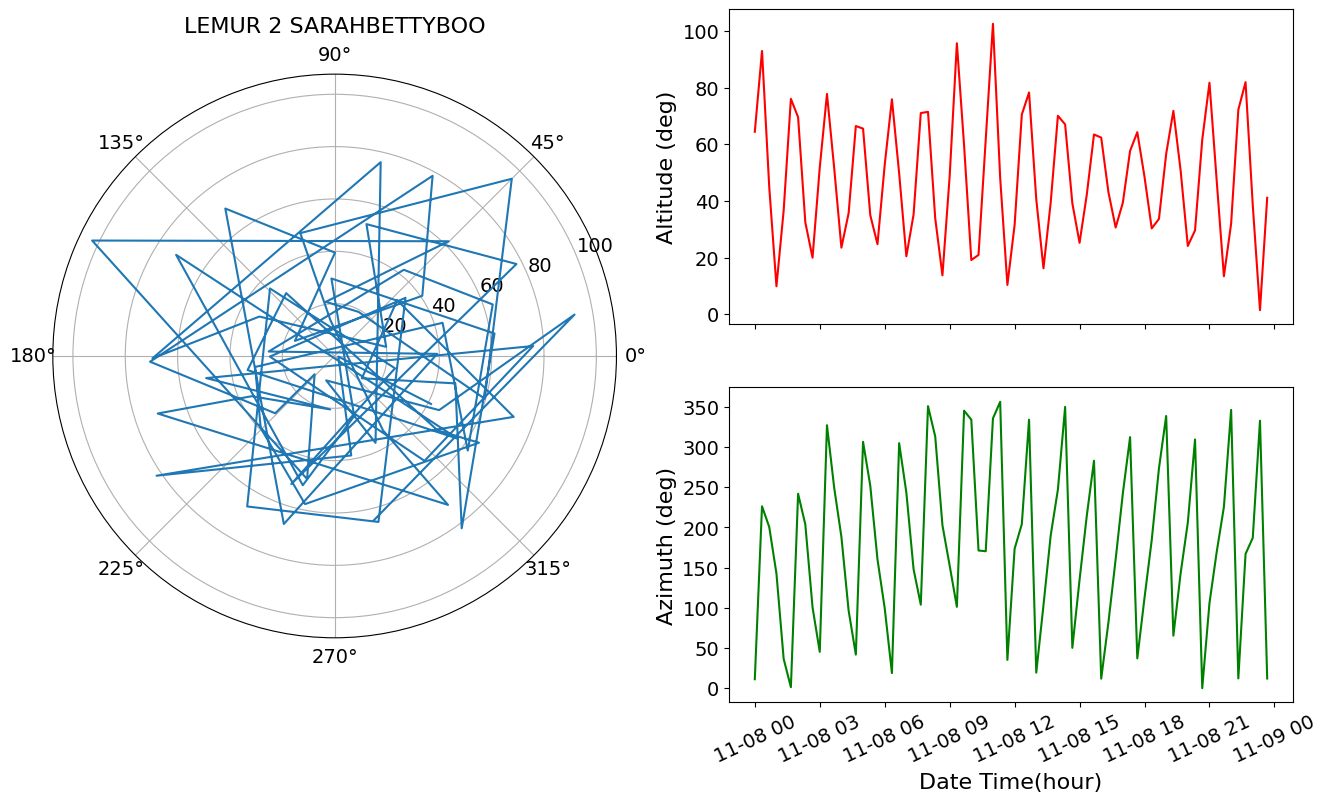

In [124]:
fig = plt.figure(figsize=(16,9))

# alt vs time
ax1 = fig.add_subplot(222)
ax1.plot(times, 90+np.array(alt), color='r')
#ax1.set_xlabel('Date')
plt.xticks(color='w')
ax1.set_ylabel('Altitude (deg)', fontsize=16)
plt.yticks(fontsize=14)
#ax1.set_title('Altitude')

# az vs time
ax2 = fig.add_subplot(224)
ax2.plot(times, az, color='g')
ax2.set_xlabel('Date Time(hour)', fontsize=16)
plt.xticks(rotation=25,fontsize=14)
ax2.set_ylabel('Azimuth (deg)', fontsize=16)
plt.yticks(fontsize=14)
#ax2.set_title('Azimuth')

## polar coordinates
ax3 = fig.add_subplot(121, projection = 'polar')
ax3.plot(az, 90+np.array(alt))
ax3.grid(True)
ax3.set_title("LEMUR 2 SARAHBETTYBOO", va='bottom', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


<div class="alert alert-block alert-info">  


## <center>PART 2 -  Processing TLEs on the large scale </center>

Here is where you process the whole TLE file, propagate orbits, compute 3D cartesian positions of the satellites and write the output to a file for opening in other analsys software. 

Below, I provide a utility function for reading the TLE file into a list of _EarthSatellite_ objects. It is for you to understand how the function works or use another method.

</div>


In [125]:
# Auxiliary function for reading 3LE files

def loadTLE(filename):
    """ Loads a TLE file and creates a list of satellites."""
    f = open(filename)
    satlist = []
    l1 = f.readline()
    while l1:
        l2 = f.readline()
        l3 = f.readline()
        sat = ephem.readtle(l1,l2,l3)
        satlist.append(sat)
        l1 = f.readline()

    f.close()
    print("%i satellites loaded into list"%len(satlist))
    return satlist

<div class="alert alert-block alert-info">  


### Read a TLE file

Read the TLEs from the file provided for this activity into a list of _EarthSatellite_ objects

</div>


In [126]:
## Set-up objects' list
objlist = loadTLE('SpaceTrack_3le_07112023.txt')

25875 satellites loaded into list


<div class="alert alert-block alert-info">  

### Compute orbits and create arrays of X,Y,Z cartesian positions relative to the centre of the Earth of the objects read above

The computations are for one fixed date of your choice. You may use the observer and a date defined in the beginning of the report, or set a new location and date (clearly indicated).

Sometimes, _ephem_ will not compute the positions and exits with an error. This is often due to the old date of some TLEs. To overcome this unwanted termination, you will have to capture those exceptions and eliminate the problematic satellites from the list. Print on the screen the names of the satellites that have been discarded.

</div>


In [127]:
## Compute orbits for the objects "objlist" relative to the observer "obs"
## and determine their X,Y,Z cartesian positions

XX, YY, ZZ = [], [], []


for i in range(0, len(objlist)):

    try:
        objlist[i].compute(obs)
    except ValueError:
        print("%i deleted %s: cannot compute the body's position at %s" % (i,objlist[i].name,obs.date))

    try:
        radius = ephem.earth_radius + objlist[i].elevation
        X = radius * np.cos(objlist[i].sublong) * np.cos(objlist[i].sublat)
        Y = radius * np.sin(objlist[i].sublong) * np.cos(objlist[i].sublat)
        Z = radius * np.sin(objlist[i].sublat)
    except RuntimeError:
        print("%i deleted %s: cannot compute the body's position at %s" % (i,objlist[i].name,obs.date))
        X=Y=Z = float('nan')
             
    XX.append(X)
    YY.append(Y)
    ZZ.append(Z)


XX = np.array(XX)
YY = np.array(YY)
ZZ = np.array(ZZ)

<div class="alert alert-block alert-info">  


### Plot cartesian XYZ positions in 3D

There are some outliers at great distances. Get rid of them to provide a good view of the LEO and GEO environments.

Note: You might get some warnings which can be safely muted with:
np.warnings.filterwarnings('ignore')

</div>


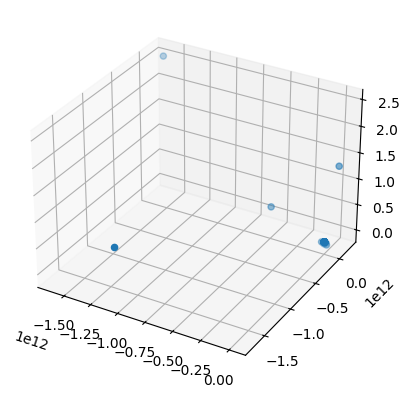

In [128]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(XX,YY,ZZ)

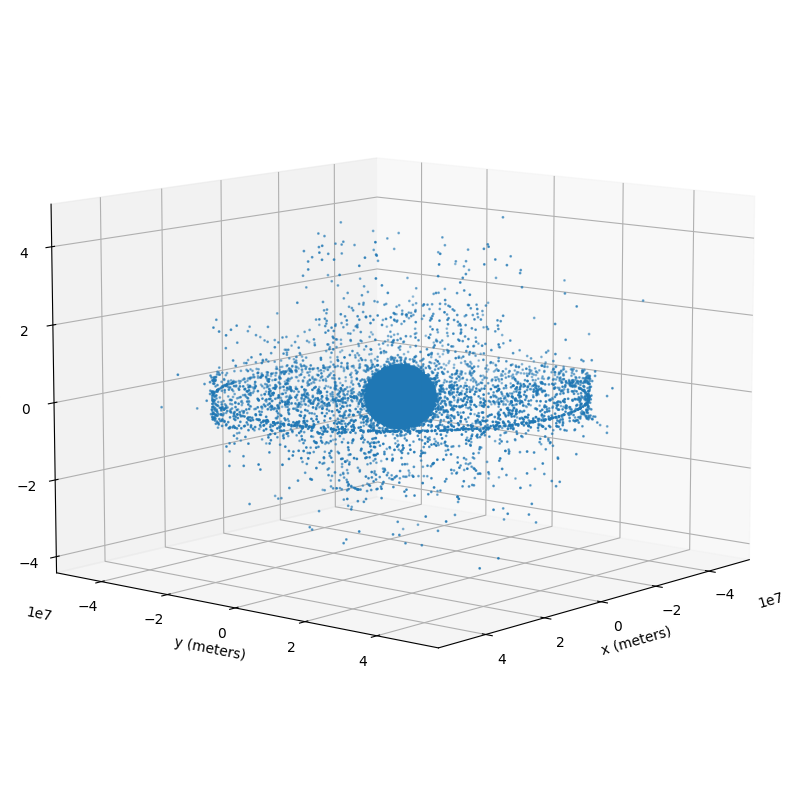

In [129]:
## Set a maximum distance and create a mask for filtering out distance > maxrad 
maxrad = 5.0e7 #meter
mask = (abs(XX) < maxrad) & (abs(YY) < maxrad) & (abs(ZZ) < maxrad) 

#initialise figure and axes. Make figure larger than the jupyter default
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

#plot the masked XYZ values. make size of markers smaller (s = 1)
ax.scatter3D(XX[mask],YY[mask],ZZ[mask], s = 1)
ax.set_xlabel('x (meters)')
ax.set_ylabel('y (meters)')
ax.set_zlabel('z (meters)')


# rotate the axes and update (angle in z, angle in xy plane)
ax.view_init(10,40)

<div class="alert alert-block alert-info">  


### Export results to a csv file

You were able to do a 3D plot showing the Earth's orbital environments. That was nice. But now we want to export the data to a file to continue exploring them with more specialised interactive visualisation software. 

For that, export the data from the orbit computation, as well as X,Y,Z to a CSV file. Include a header identifying the columns listed.  

Note: You may also make the header more human friendy by changing the names in some fields (e.g. _n -> mean motion). Remember that the "help" instruction provides a description of the variables.

</div>


In [130]:
attrlist=dir(objlist[0])
print(attrlist)

['M', '_M', '__class__', '__copy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'ap', 'az', 'catalog_number', 'circumpolar', 'compute', 'copy', 'dec', 'decay', 'drag', 'e', 'eclipsed', 'elevation', 'elong', 'epoch', 'g_dec', 'g_ra', 'ha', 'inc', 'mag', 'n', 'name', 'neverup', 'orbit', 'parallactic_angle', 'ra', 'raan', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'writedb']


In [131]:
nobj = 0
print("** Attributes for %s ** (name, value)"%objlist[nobj].name)
for attr in attrlist:
    a = getattr(objlist[nobj], attr)
    print("%s\t %s" % (attr,a)) 

** Attributes for 0 VANGUARD 1 ** (name, value)
M	 209.601806640625
_M	 209:36:06.5
__class__	 <class 'ephem.EarthSatellite'>
__copy__	 <built-in method __copy__ of ephem.EarthSatellite object at 0x7fb37f76b480>
__delattr__	 <method-wrapper '__delattr__' of ephem.EarthSatellite object at 0x7fb37f76b480>
__dir__	 <built-in method __dir__ of ephem.EarthSatellite object at 0x7fb37f76b480>
__doc__	 A satellite in orbit around the Earth, usually built by passing the text of a TLE entry to the `ephem.readtle()` routine. You can read and write its orbital parameters through the following attributes:

_ap -- argument of perigee at epoch (degrees)
_decay -- orbit decay rate (revolutions per day-squared)
_drag -- object drag coefficient (per earth radius)
_e -- eccentricity
_epoch -- reference epoch (mjd)
_inc -- inclination (degrees)
_M -- mean anomaly (degrees from perigee at epoch)
_n -- mean motion (revolutions per day)
_orbit -- integer orbit number of epoch
_raan -- right ascension of asce

attrlist = ['perigee@epoch(deg)', 'DecayRate(rev/day^2)', '_drag', 'Eccentricity', '_epoch', 'Inclination(deg)', 'MeanMotion(rev/day)', '_orbit', '_raan', 'a_dec', 
               'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 
               'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 
               'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 
               'transit_alt', 'transit_time']

In [132]:
attrlist = ['_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 
               'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 
               'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 
               'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 
               'transit_alt', 'transit_time']

In [133]:
# Create the "header" array
header = attrlist.copy()
header.append('X')
header.append('Y')
header.append('Z')

header[0:14] = ['Perigee@Epoch(deg)',                                                       # _ap
                'DecayRate(rev/day^2)',
                'DragCoeff',
                'Eccentricity',
                'ReferenceEpoch',
                'Inclination(deg)',
                'MeanMotion(rev/day)',
                'OrbitNumber',
                'RightAscensionOfAscendingNode(deg)',
                'AstrometricGeocentricDeclination',
                'DateGivingTheEquinoxOfTheBodyAstrometricRightAscensionAndDeclination',
                'AstrometricGeocentricRightAscension',
                'Altitude',
                'Azimute']
header[16] = 'Declination'                                                                  # dec
header[19:28] = ['ApparentGeocentricDeclination',
                 'ApparentGeocentricRightAscension',
                 'Magnitude',
                 'ObjectName',
                 'NeverUp',
                 'RightAscension',
                 'VisualRadius',
                 'DistanceFromObserver2Satellite(m)']

print(header)

['Perigee@Epoch(deg)', 'DecayRate(rev/day^2)', 'DragCoeff', 'Eccentricity', 'ReferenceEpoch', 'Inclination(deg)', 'MeanMotion(rev/day)', 'OrbitNumber', 'RightAscensionOfAscendingNode(deg)', 'AstrometricGeocentricDeclination', 'DateGivingTheEquinoxOfTheBodyAstrometricRightAscensionAndDeclination', 'AstrometricGeocentricRightAscension', 'Altitude', 'Azimute', 'catalog_number', 'circumpolar', 'Declination', 'eclipsed', 'elevation', 'ApparentGeocentricDeclination', 'ApparentGeocentricRightAscension', 'Magnitude', 'ObjectName', 'NeverUp', 'RightAscension', 'VisualRadius', 'DistanceFromObserver2Satellite(m)', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'X', 'Y', 'Z']


In [134]:
# Open the file for writing (create if necessary)
resultFile = open("XYZtle_07112023.csv",'w')
wr = csv.writer(resultFile, delimiter=',')

# write the header
# Note: we may also make the header more human friendy by changing the names in some fields
# (e.g. _n -> mean motion)
wr.writerow(header)

630

In [135]:
# Write the data. Don't forget to include X, Y and Z

# iterate over the objects
for i in range(0, len(objlist)):
    outline = []
    # fill the output line by iterating over the object's attributes
    for attr in attrlist:
        try:
            a = getattr(objlist[i], attr)
        except RuntimeError:
            a = (float('nan'))
        try:
            outline.append(float(a))
        except ValueError:
            outline.append(a)
        except TypeError:
            outline.append(float('nan'))

    # append the computed XYZ (example using extend instead of append)
    outline.extend((XX[i], YY[i], ZZ[i]))  
    # write the line for this object
    wr.writerow(outline)

# close the output file
resultFile.close() 

<div class="alert alert-block alert-info">  

Check all went fine: Print the header and first lines to the screen
</div>


In [136]:
resultFile = open("XYZtle_07112023.csv",'r')
content = resultFile.readline()
print(content)


Perigee@Epoch(deg),DecayRate(rev/day^2),DragCoeff,Eccentricity,ReferenceEpoch,Inclination(deg),MeanMotion(rev/day),OrbitNumber,RightAscensionOfAscendingNode(deg),AstrometricGeocentricDeclination,DateGivingTheEquinoxOfTheBodyAstrometricRightAscensionAndDeclination,AstrometricGeocentricRightAscension,Altitude,Azimute,catalog_number,circumpolar,Declination,eclipsed,elevation,ApparentGeocentricDeclination,ApparentGeocentricRightAscension,Magnitude,ObjectName,NeverUp,RightAscension,VisualRadius,DistanceFromObserver2Satellite(m),range_velocity,rise_az,rise_time,set_az,set_time,size,sublat,sublong,transit_alt,transit_time,X,Y,Z



<div class="alert alert-block alert-info">  


### Quick analyis with TOPCAT

* Open the csv file in TOPCAT
* Make a 3D plot of X,Y,Z to show the LEO/MEO/GEO environments
* Make a (2D) scatter plot of eccentricity vs mean_motion
* Create a subset of the data by selecting a region you find interesting in the 2D plot
* Show how this subset appears distributed in the 3D plot
* Take a screenshot of your Desktop with the TOPCAT plots clearly seen and display it in the markdown cell below (double click on the example image from Gaia DR3)

</div>



![This image is a placeholder. Change it](topcat_results_final.png)